# Tentando gerar um mapa topográfico na mão.

## Preciso trabalhar mais nisso depois...

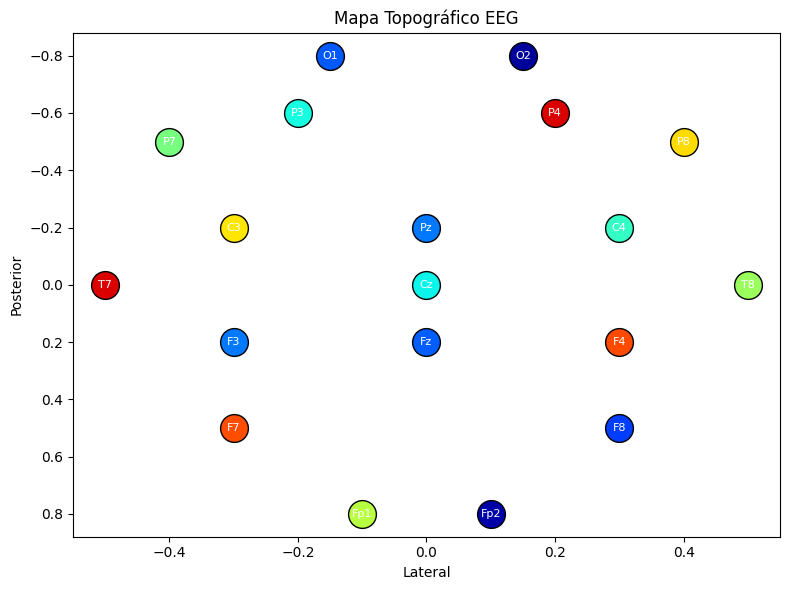

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Defina as coordenadas dos eletrodos em um layout 2D
electrode_coords = {
    'Fp1': (-0.1, 0.8), 'Fp2': (0.1, 0.8),
    'F7': (-0.3, 0.5), 'F3': (-0.3, 0.2), 'Fz': (0, 0.2), 'F4': (0.3, 0.2), 'F8': (0.3, 0.5),
    'T7': (-0.5, 0), 'C3': (-0.3, -0.2), 'Cz': (0, 0), 'C4': (0.3, -0.2), 'T8': (0.5, 0),
    'P7': (-0.4, -0.5), 'P3': (-0.2, -0.6), 'Pz': (0, -0.2), 'P4': (0.2, -0.6), 'P8': (0.4, -0.5),
    'O1': (-0.15, -0.8), 'O2': (0.15, -0.8)
}

# Defina os valores do sinal EEG para cada eletrodo
# Aqui, vou apenas gerar valores aleatórios para fins de exemplo
num_electrodes = 19
eeg_values = np.random.rand(num_electrodes)

# Plote o mapa topográfico
plt.figure(figsize=(8, 6))

# Plote os eletrodos
for electrode, (x, y) in electrode_coords.items():
    plt.plot(x, y, 'ko')  # 'ko' representa marcadores pretos circulares
    plt.text(x, y, electrode, fontsize=8, ha='center', va='center', color='white')

# Plote os valores do sinal EEG como cores no mapa topográfico
for electrode, (x, y) in electrode_coords.items():
    value = eeg_values[list(electrode_coords.keys()).index(electrode)]
    plt.plot(x, y, marker='o', markersize=20, markerfacecolor=plt.cm.jet(value), markeredgecolor='k')

plt.title('Mapa Topográfico EEG')
plt.xlabel('Lateral')
plt.ylabel('Posterior')
plt.grid(False)
plt.gca().invert_yaxis()  # Inverte o eixo y para corresponder à orientação padrão do EEG
plt.tight_layout()
plt.show()


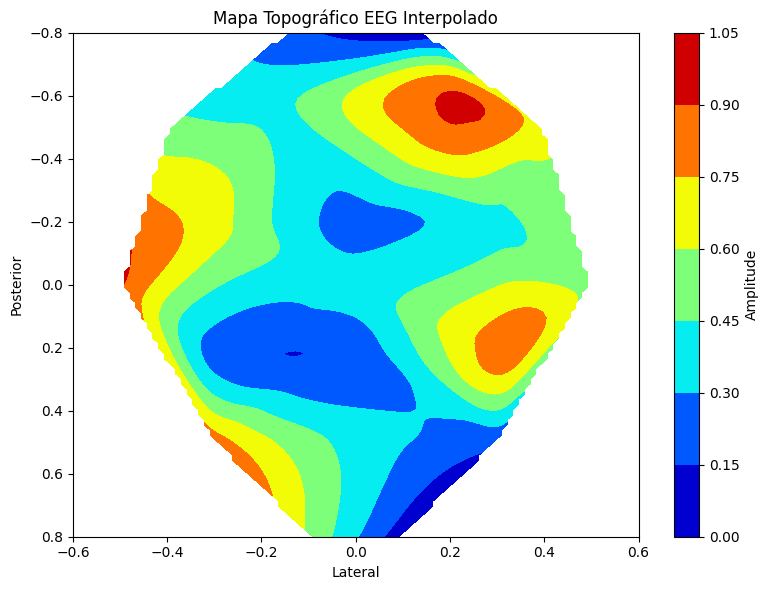

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata


# Defina uma grade de pontos para interpolação
x = np.linspace(-0.6, 0.6, 100)
y = np.linspace(-0.8, 0.8, 100)
X, Y = np.meshgrid(x, y)

# Interpole os valores do sinal EEG
Z = griddata(list(electrode_coords.values()), eeg_values, (X, Y), method='cubic')

# Plote o mapa topográfico interpolado
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, cmap='jet')
plt.colorbar(label='Amplitude')
plt.title('Mapa Topográfico EEG Interpolado')
plt.xlabel('Lateral')
plt.ylabel('Posterior')
plt.grid(False)
plt.gca().invert_yaxis()  # Inverte o eixo y para corresponder à orientação padrão do EEG
plt.tight_layout()
plt.show()


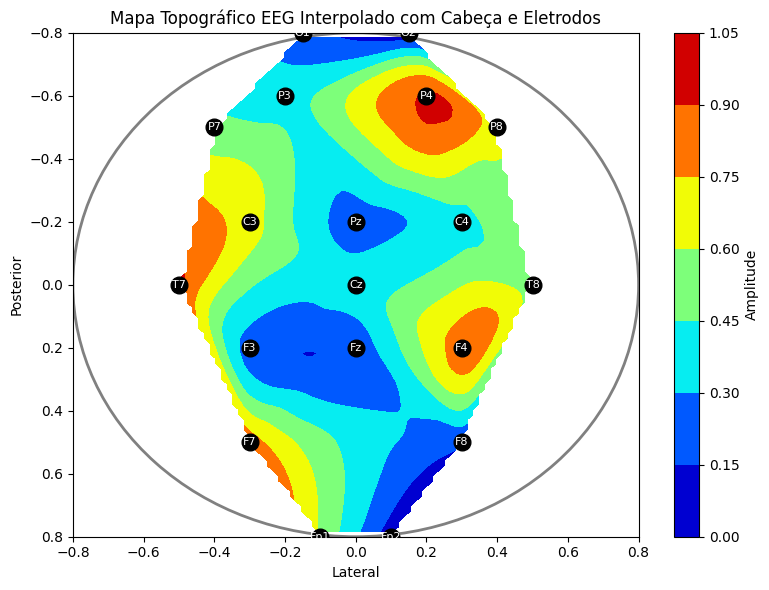

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Defina uma grade de pontos para interpolação
x = np.linspace(-0.8, 0.8, 100)
y = np.linspace(-0.8, 0.8, 100)
X, Y = np.meshgrid(x, y)

# Interpole os valores do sinal EEG
Z = griddata(list(electrode_coords.values()), eeg_values, (X, Y), method='cubic')

# Defina a máscara para o círculo da cabeça
head_circle_mask = (X**2 + Y**2) <= 0.8**2

# Aplique a máscara para preencher apenas os pontos dentro do círculo da cabeça
Z[~head_circle_mask] = np.nan

# Plote o mapa topográfico interpolado com a cabeça e os eletrodos
plt.figure(figsize=(8, 6))

# Plote a cabeça (um círculo)
head_circle = plt.Circle((0, 0), 0.8, color='gray', fill=False, linewidth=2)
plt.gca().add_artist(head_circle)

# Plote os eletrodos
for electrode, (x, y) in electrode_coords.items():
    plt.plot(x, y, 'ko', markersize=12)  # aumentando o tamanho dos círculos dos eletrodos
    plt.text(x, y, electrode, fontsize=8, ha='center', va='center', color='white')

# Plote os valores do sinal EEG como cores no mapa topográfico
plt.contourf(X, Y, Z, cmap='jet')
plt.colorbar(label='Amplitude')
plt.title('Mapa Topográfico EEG Interpolado com Cabeça e Eletrodos')
plt.xlabel('Lateral')
plt.ylabel('Posterior')
plt.grid(False)
plt.gca().invert_yaxis()  # Inverte o eixo y para corresponder à orientação padrão do EEG
plt.tight_layout()
plt.show()